In [1]:
import os
import pandas as pd
import sklearn
import csv
import datetime
import numpy as np
# 可視化用
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## データの読み込み


入力データ

http://mlr.cs.umass.edu/ml/datasets/Adult


In [6]:
ls ../data/adult/

adult.data   adult.names  adult.test


In [7]:
# 学習用データ
!head ../data/adult/adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

In [8]:
# 各カラムの説明
!cat ../data/adult/adult.names

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [9]:
!head ../data/adult/adult.test

|1x3 Cross validator
25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K.
38, Private, 89814, HS-grad, 9, Married-civ-spouse, Farming-fishing, Husband, White, Male, 0, 0, 50, United-States, <=50K.
28, Local-gov, 336951, Assoc-acdm, 12, Married-civ-spouse, Protective-serv, Husband, White, Male, 0, 0, 40, United-States, >50K.
44, Private, 160323, Some-college, 10, Married-civ-spouse, Machine-op-inspct, Husband, Black, Male, 7688, 0, 40, United-States, >50K.
18, ?, 103497, Some-college, 10, Never-married, ?, Own-child, White, Female, 0, 0, 30, United-States, <=50K.
34, Private, 198693, 10th, 6, Never-married, Other-service, Not-in-family, White, Male, 0, 0, 30, United-States, <=50K.
29, ?, 227026, HS-grad, 9, Never-married, ?, Unmarried, Black, Male, 0, 0, 40, United-States, <=50K.
63, Self-emp-not-inc, 104626, Prof-school, 15, Married-civ-spouse, Prof-specialty, Husband, White, Male, 3103, 0, 32, United-States, >50K.
24, 

## データクリーニング

## trainデータのクリーニング

## testデータのクリーニング

## カラム情報の取得

## データ型の判別

## DataFrameの作成

## 説明変数の加工

## 目的変数の加工
<=50K: 0, >50K: 1 とする

# EDA

## 目的変数の傾向

## 年齢との関係

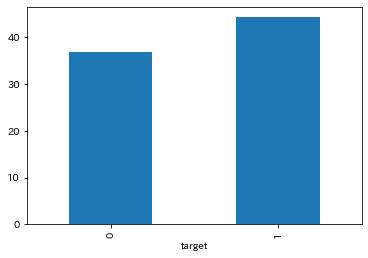

In [32]:
df_train.groupby("target").mean()["age"].plot.bar()

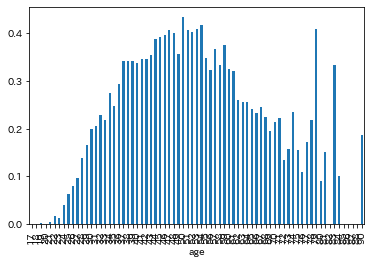

In [33]:
df_train.groupby("age").mean()["target"].plot.bar()

## capital gain(資産利得)との関係

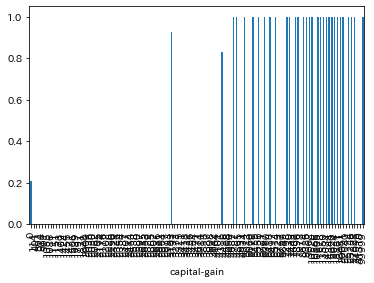

In [34]:
df_train.groupby("capital-gain").mean()["target"].plot.bar()

### binningを実施する

In [35]:
df_train["capital-gain_bin30"] = pd.cut(df_train["capital-gain"], 30)

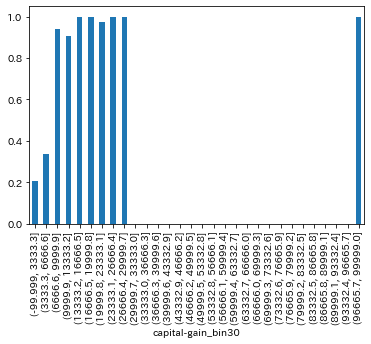

In [36]:
df_train.groupby("capital-gain_bin30").mean()["target"].plot.bar()

## 労働時間との比較

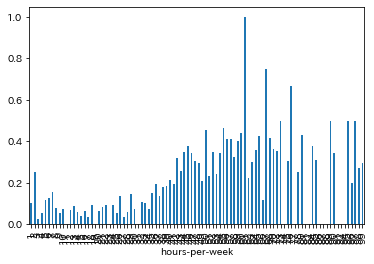

In [37]:
df_train.groupby("hours-per-week").mean()["target"].plot.bar()

## カテゴリカル変数の可視化

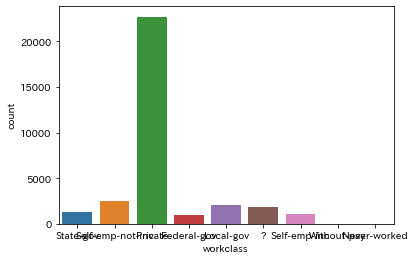

In [38]:
g = sns.countplot(x="workclass", data=df_train)

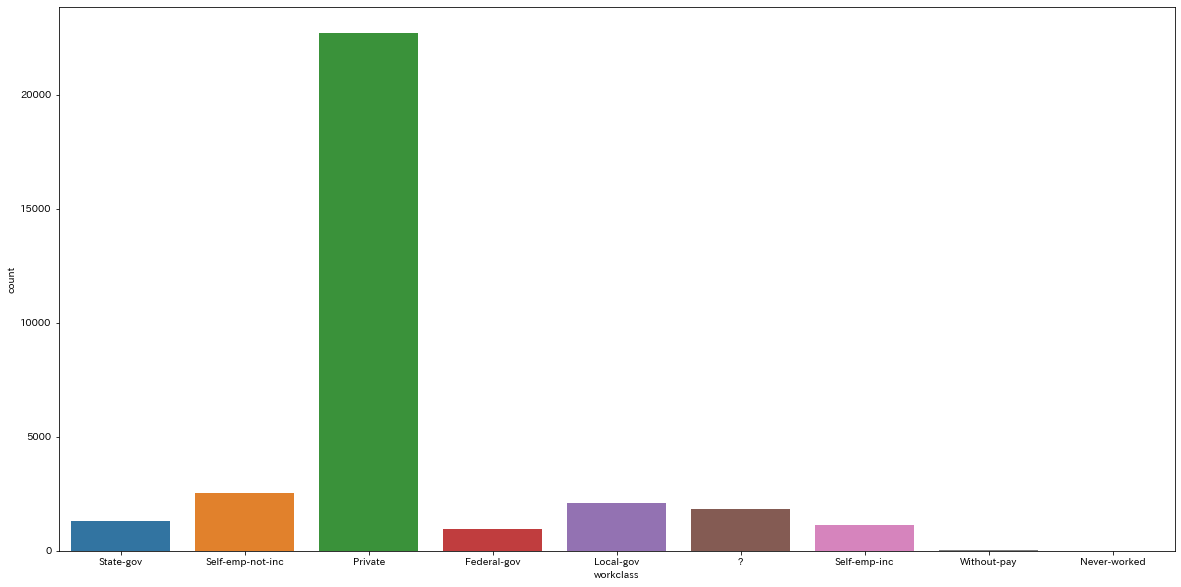

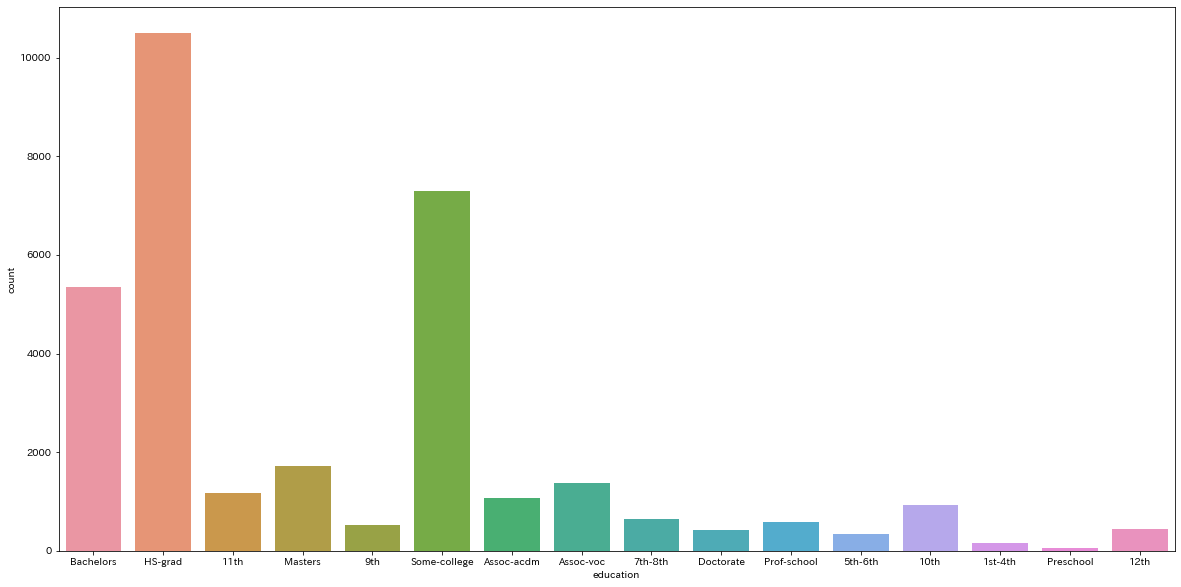

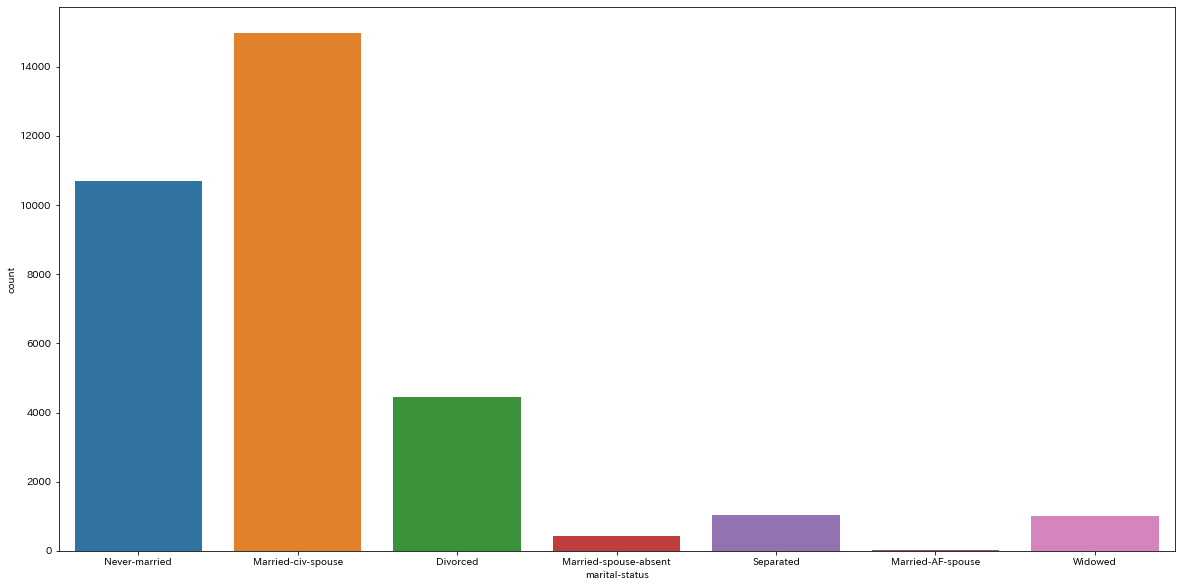

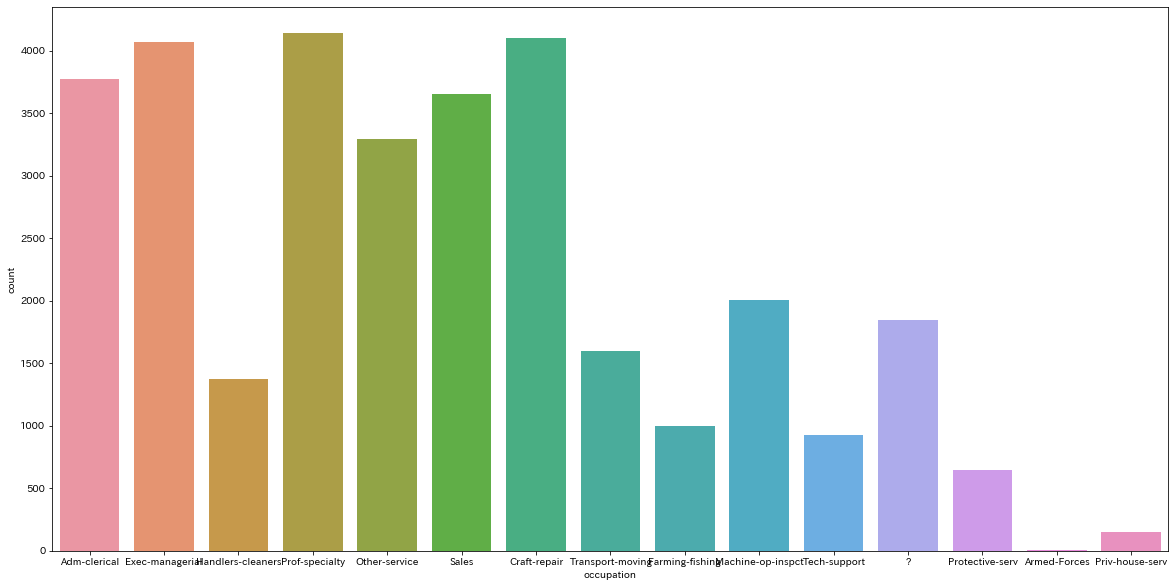

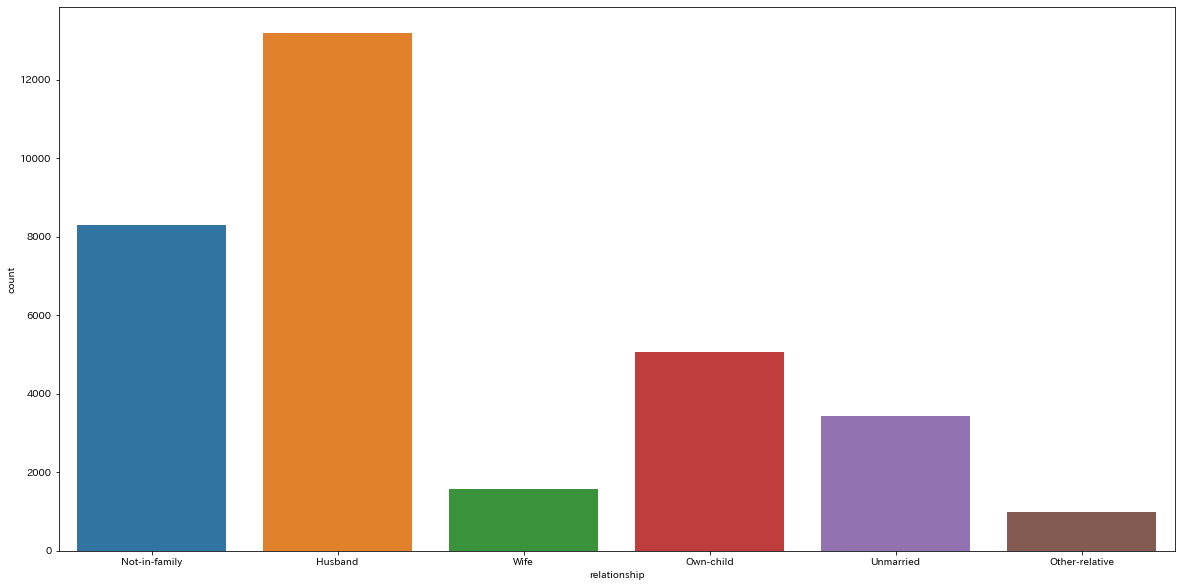

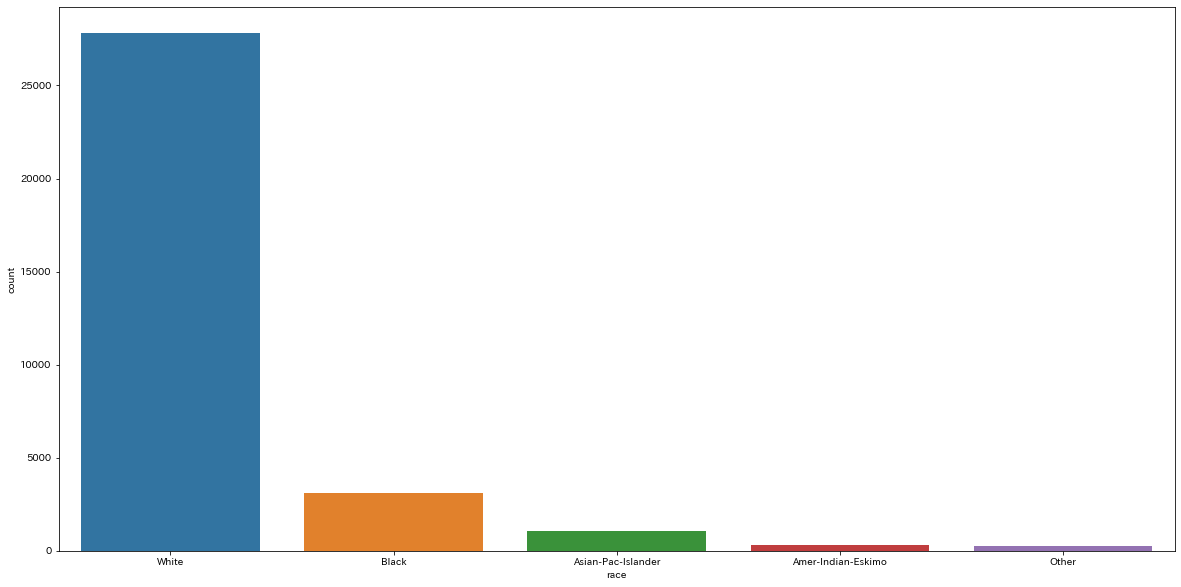

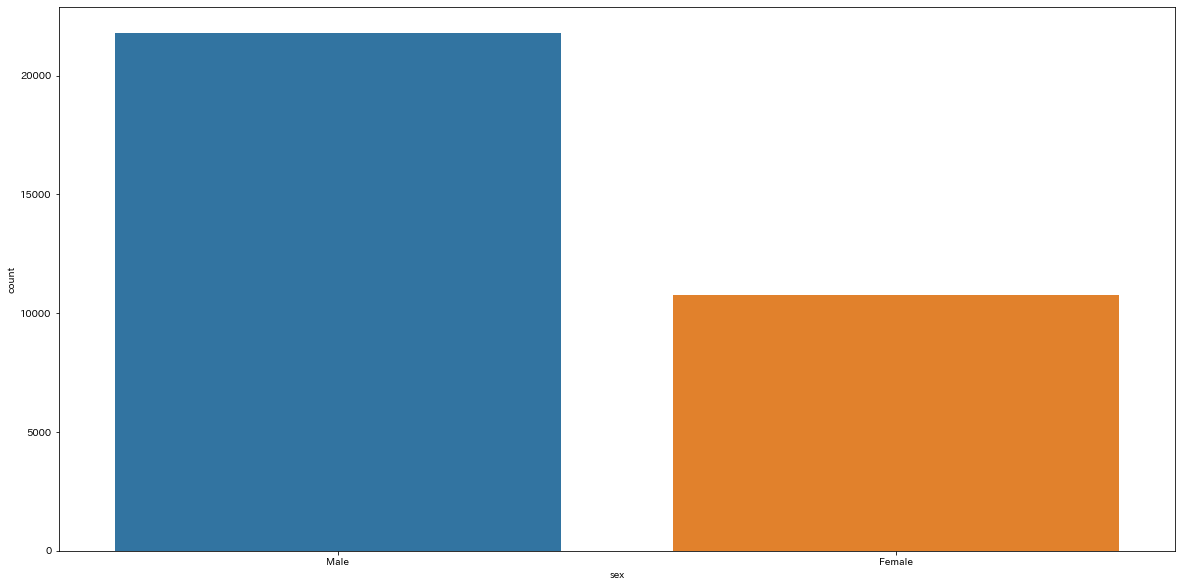

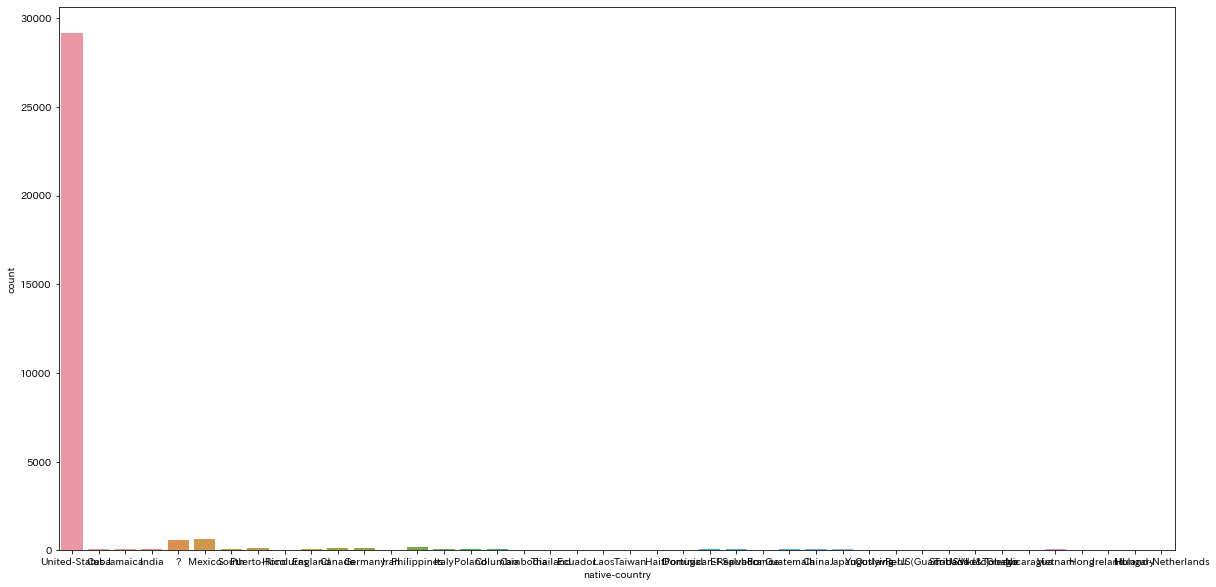

In [39]:
for col in categorical_values.keys():
    plt.figure(figsize=(20, 10))
    g = sns.countplot(x=col, data=df_train)
    plt.show()

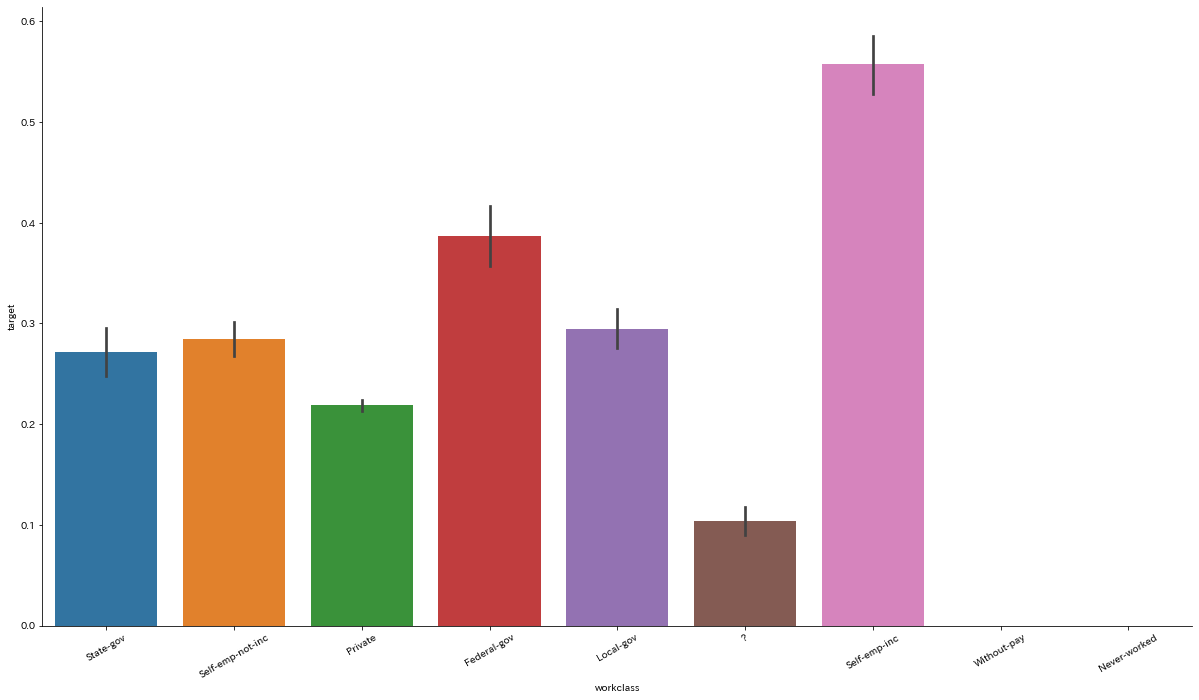

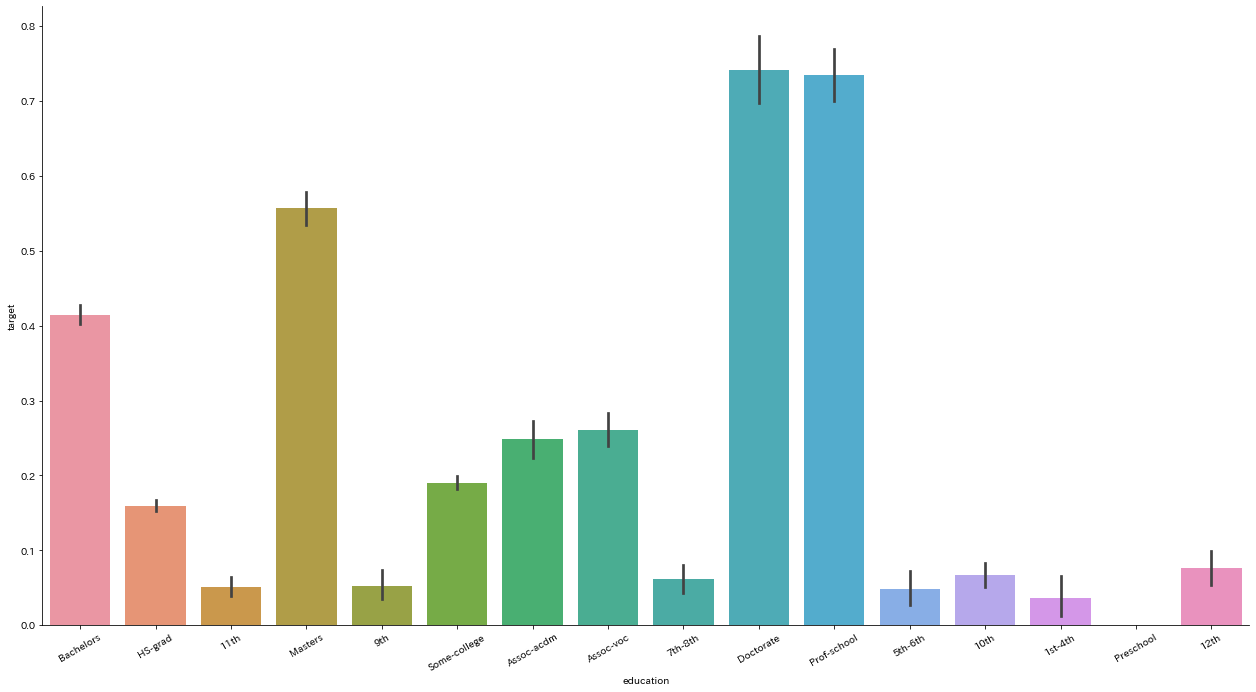

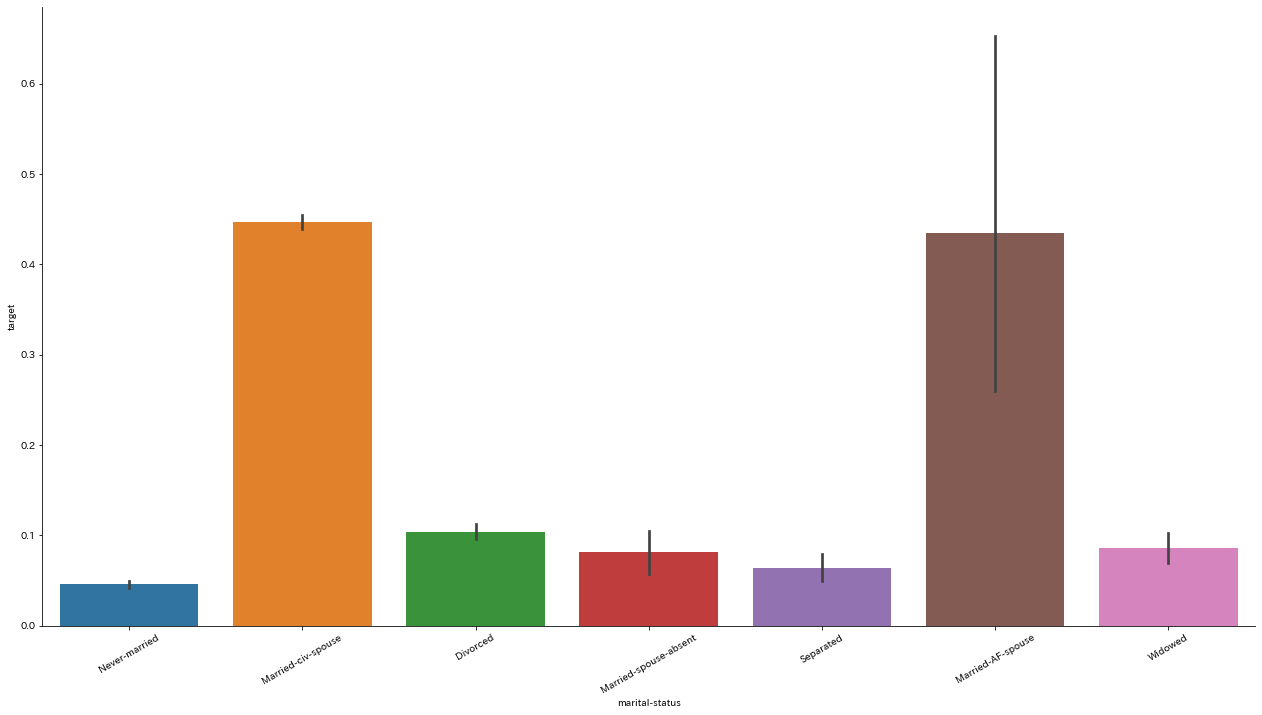

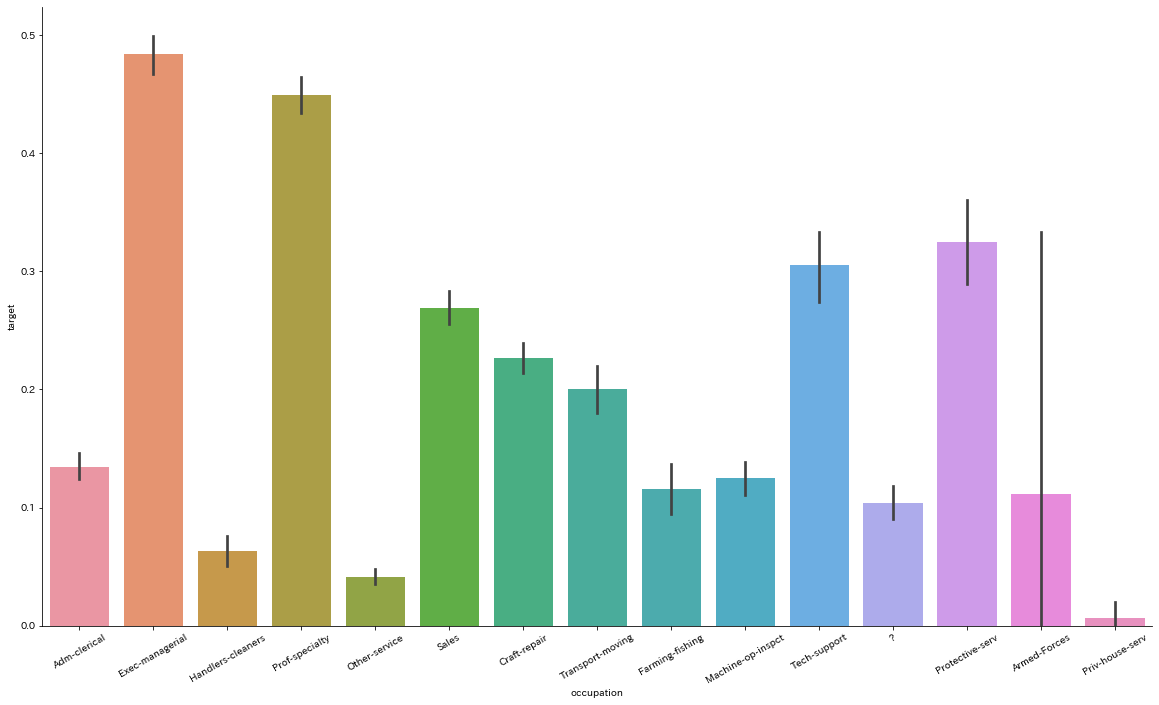

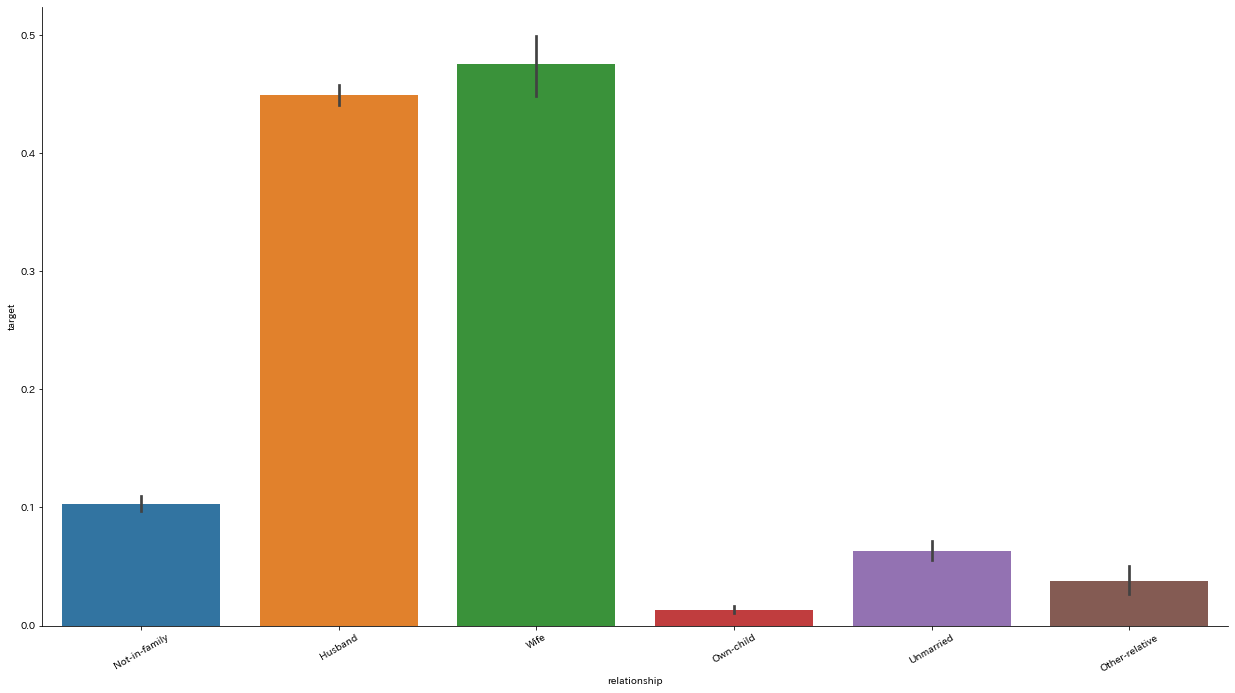

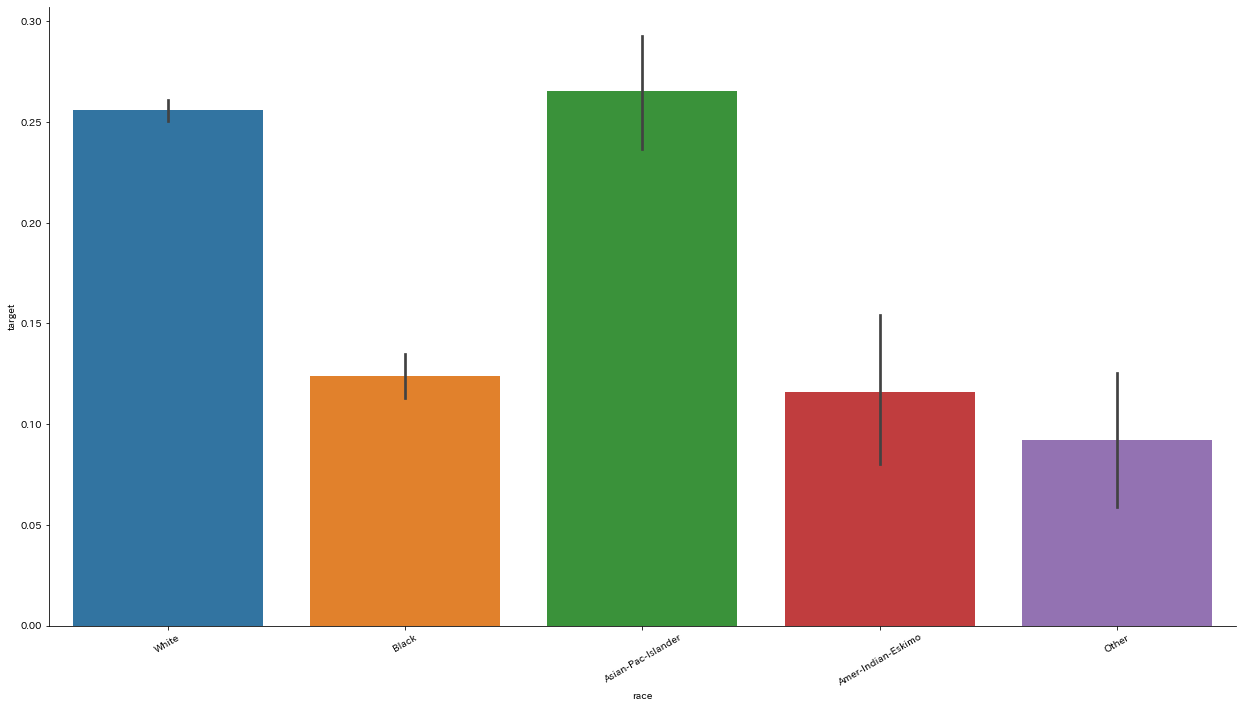

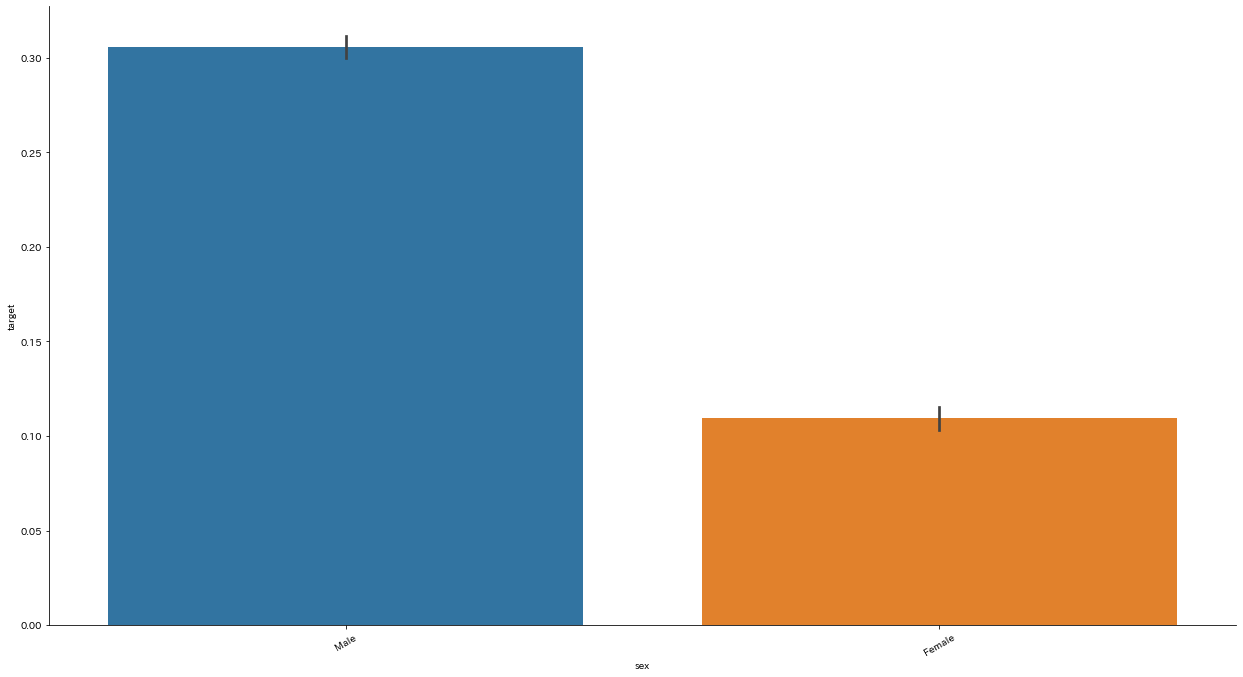

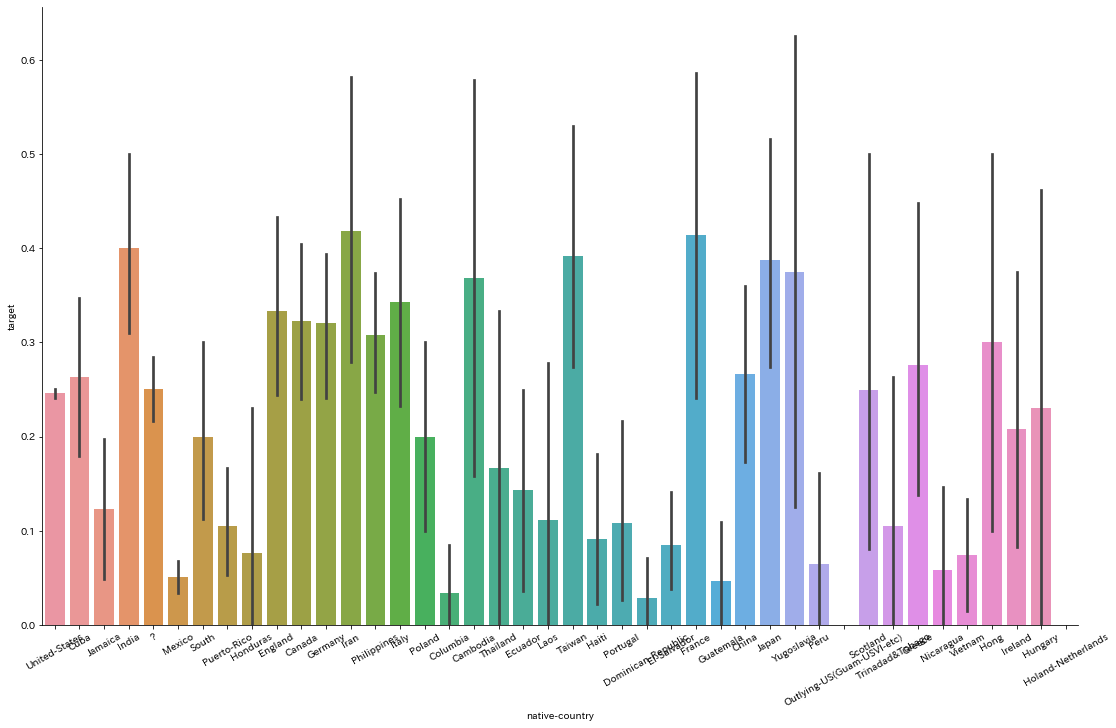

In [40]:
for col in categorical_values.keys():
    g = sns.catplot(x=col, y="target", kind="bar", data=df_train)
    g.fig.set_size_inches(20,10)
    g.set_xticklabels(rotation=30)
    plt.show()

# 予測分析

## カテゴリカル変数の利用 ~ label encoding ~

In [41]:
from sklearn import preprocessing

## 検証設計

validation: trainの20%

holdout(test): testデータ

In [46]:
from sklearn import model_selection

## LightGBMによる予測

In [51]:
import lightgbm as lgb

# 精度検証

## 正解率(accuracy)
閾値p（確率がp以上の時に1とする）を0.5として計算する

# Precision & Recall & AUC
<img src="precision_recall.png">

## Precision

In [88]:
from sklearn.metrics import precision_score

## Recall

In [98]:
from sklearn.metrics import recall_score

## 混合行列(confusion matrix)

In [104]:
from sklearn.metrics import confusion_matrix

## AUC(area under the curve)

### ダミーデータによる理解

In [106]:
from sklearn.metrics import roc_curve, auc

## AUC(今回のデータセットに適用する)

In [127]:
# FPR, TPR(, しきい値) を算出
from sklearn.metrics import auc

array([0.        , 0.        , 0.        , ..., 0.9973462 , 0.99750704,
       1.        ])